### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


### Datasets and Files

In [3]:
ease = pd.read_csv('data/ease-of-doing-business.csv', usecols=['Country Name', 'Country Code', '2019'])
unemp = pd.read_csv('data/unemployment.csv')
GDPgrowth = pd.read_excel('data/economic-growth-indicators.xlsx', sheet_name='Growth Rate of GDP')
HDI = pd.read_excel('data/economic-growth-indicators.xlsx', sheet_name='HDI')
prod = pd.read_excel('data/economic-growth-indicators.xlsx', sheet_name='Productivity')


In [4]:
#ease_df = ease.filter(['Country Name', 'Country Code', '2019']).set_index('Country Name')
ease_df = ease.set_index('Country Name')

In [5]:
display(ease_df.shape,unemp.shape, GDPgrowth.shape, HDI.shape, prod.shape)

(266, 2)

(266, 67)

(19, 8)

(20, 9)

(12, 5)

In [6]:
ease_df.head()

,Country Code,2019
Country Name,,
Aruba,ABW,NaN
Africa Eastern and Southern,AFE,NaN
Afghanistan,AFG,173.0
Africa Western and Central,AFW,NaN
Angola,AGO,177.0


In [7]:
ease_df.isnull().sum().sum()

77

In [8]:
ease_df.dropna(axis=0, how='any', inplace = True) # 0 indicates the rows and inplace set to true modifies current dataframe

In [9]:
ease_df.isnull().sum().sum() 

0

In [10]:
print(ease_df)

                     Country Code   2019
Country Name                            
Afghanistan                   AFG  173.0
Angola                        AGO  177.0
Albania                       ALB   82.0
United Arab Emirates          ARE   16.0
Argentina                     ARG  126.0
...                           ...    ...
Kosovo                        XKX   57.0
Yemen, Rep.                   YEM  187.0
South Africa                  ZAF   84.0
Zambia                        ZMB   85.0
Zimbabwe                      ZWE  140.0

[189 rows x 2 columns]


In [11]:
print(ease_df['Country Code'].unique())

['AFG' 'AGO' 'ALB' 'ARE' 'ARG' 'ARM' 'ATG' 'AUS' 'AUT' 'AZE' 'BDI' 'BEL'
 'BEN' 'BFA' 'BGD' 'BGR' 'BHR' 'BHS' 'BIH' 'BLR' 'BLZ' 'BOL' 'BRA' 'BRB'
 'BRN' 'BTN' 'BWA' 'CAF' 'CAN' 'CHE' 'CHL' 'CHN' 'CIV' 'CMR' 'COD' 'COG'
 'COL' 'COM' 'CPV' 'CRI' 'CYP' 'CZE' 'DEU' 'DJI' 'DMA' 'DNK' 'DOM' 'DZA'
 'ECU' 'EGY' 'ERI' 'ESP' 'EST' 'ETH' 'FIN' 'FJI' 'FRA' 'FSM' 'GAB' 'GBR'
 'GEO' 'GHA' 'GIN' 'GMB' 'GNB' 'GNQ' 'GRC' 'GRD' 'GTM' 'GUY' 'HKG' 'HND'
 'HRV' 'HTI' 'HUN' 'IDN' 'IND' 'IRL' 'IRN' 'IRQ' 'ISL' 'ISR' 'ITA' 'JAM'
 'JOR' 'JPN' 'KAZ' 'KEN' 'KGZ' 'KHM' 'KIR' 'KNA' 'KOR' 'KWT' 'LAO' 'LBN'
 'LBR' 'LBY' 'LCA' 'LKA' 'LSO' 'LTU' 'LUX' 'LVA' 'MAR' 'MDA' 'MDG' 'MDV'
 'MEX' 'MHL' 'MKD' 'MLI' 'MLT' 'MMR' 'MNE' 'MNG' 'MOZ' 'MRT' 'MUS' 'MWI'
 'MYS' 'NAM' 'NER' 'NGA' 'NIC' 'NLD' 'NOR' 'NPL' 'NZL' 'OMN' 'PAK' 'PAN'
 'PER' 'PHL' 'PLW' 'PNG' 'POL' 'PRI' 'PRT' 'PRY' 'PSE' 'QAT' 'ROU' 'RUS'
 'RWA' 'SAU' 'SDN' 'SEN' 'SGP' 'SLB' 'SLE' 'SLV' 'SMR' 'SOM' 'SRB' 'SSD'
 'STP' 'SUR' 'SVK' 'SVN' 'SWE' 'SWZ' 'SYC' 'SYR' 'T

In [12]:
ease_df.columns

Index(['Country Code', '2019'], dtype='object')

In [13]:
ease_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 189 entries, Afghanistan to Zimbabwe
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Code  189 non-null    object 
 1   2019          189 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.4+ KB


In [14]:
#ease_df["Country Name"] = ease_df["Country Name"].replace(['Brunei Darussalam', 'Lao PDR'], ['Brunei', 'Laos'])
ease_df.rename(index={'Brunei Darussalam':'Brunei','Lao PDR' : 'Laos' },inplace=True)

In [15]:
ease_df.isnull().sum().sum() 

0

In [16]:
ease_df.loc['Brunei']

Country Code     BRN
2019            66.0
Name: Brunei, dtype: object

In [17]:
ASEANCountries = ["Brunei", "Cambodia", "Indonesia", "Laos", "Malaysia", "Myanmar", "Philippines", 
                  "Singapore", "Thailand", "Vietnam"]

In [18]:
#ease_df_sorted= ease_df.sort_values(by ='2019')

In [19]:
#print(ease_df_sorted)

In [20]:
ASEAN_ease = ease_df.loc[ASEANCountries].sort_values(by ='2019')

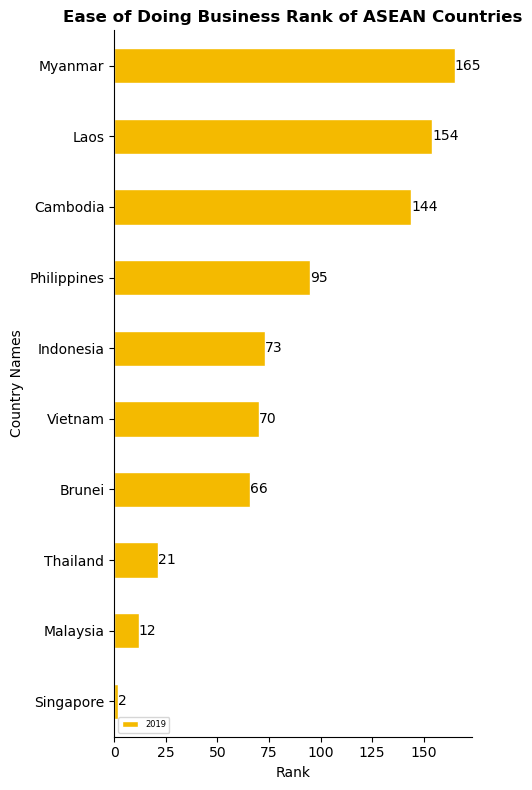

In [21]:
fig = plt.figure(figsize=(5,8))
ax = fig.add_subplot(1,1,1)

ASEAN_ease.plot(y = '2019', fontsize=10, kind='barh', ax=ax, edgecolor='w', color = '#F4BA00')

ax.set_title('Ease of Doing Business Rank of ASEAN Countries', fontsize=12, fontweight ='bold')
ax.set_xlabel('Rank', fontsize=10)
ax.set_ylabel('Country Names', fontsize=10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.grid(False)
ax.legend(fontsize=6)

for bars in ax.containers:
    ax.bar_label(bars)


plt.tight_layout()
#plt.savefig(fname = 'Images/Name')

In [22]:
unemp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.512784,6.555645,6.707142,6.855589,6.940365,6.913046,7.121664,7.631303,7.920219,7.916831
2,Afghanistan,AFG,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.949000,7.910000,8.989000,10.086000,11.180000,11.110000,11.085000,11.710000,NaN,NaN
3,Africa Western and Central,AFW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.804447,3.985878,4.241136,4.112958,4.140484,4.201599,4.261414,4.914143,4.873635,4.742175
4,Angola,AGO,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,8.834000,9.580000,9.584000,9.586000,9.535000,9.522000,9.481000,10.350000,10.384000,10.209000


In [23]:
GDPgrowth.head()

,Unnamed: 0,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,1.2,3.9,-2.4,-20.7,NaN,NaN,NaN
1,Bangladesh,7.3,7.9,3.4,6.9,7.1,5.3,6.5
2,Bhutan,3.1,5.8,-10.0,4.1,4.7,4.6,4.2
3,India,6.5,3.9,-5.8,9.1,6.8,6.4,6.7
4,Maldives,8.1,7.1,-33.5,41.7,12.3,7.1,6.9


In [24]:
HDI.head()

,Unnamed: 0,2018 HDI value,2019 HDI value,2020 HDI value,2021 HDI value,Life expectancy at birth in years (2021),Expected years of schooling in years (2021),Mean years of schooling in years (2021),Gross national income (GNI) per capita (2021)
0,Afghanistan,0.483,0.488,0.483,0.478,62.0,10.3,3.0,1824.0
1,Bangladesh,0.635,0.644,0.655,0.661,72.4,12.4,7.4,5472.0
2,Bhutan,0.658,0.671,0.668,0.666,71.8,13.2,5.2,9438.0
3,India,0.645,0.645,0.642,0.633,67.2,11.9,6.7,6590.0
4,Maldives,0.750,0.755,0.734,0.747,79.9,12.6,7.3,15448.0


In [25]:
prod.head()

,Unnamed: 0,2016,2017,2018,2019
0,Bangladesh,4.113085,4.307637,4.591530,4.791032
1,India,7.609988,8.009788,8.536673,8.680879
2,Pakistan,7.953004,8.322207,8.668698,8.772413
3,Sri Lanka,17.275410,17.048510,17.891240,18.019520
4,Cambodia,2.828313,3.022650,3.263742,3.433210


In [26]:
#print(ease.info(), unemp.info(), GDPgrowth.info(), HDI.info(), prod.info())